<a href="https://colab.research.google.com/github/sj0delacruz/delaCruzSamir_RECV_Entrega2/blob/main/delaCruzSamir_RECV_Entrega2%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Cars93.csv")
data.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [6]:
data = data.drop(['Unnamed: 0','Min.Price', 'Max.Price'], axis=1)
Y = data['Price'].copy()
data = data.drop('Price', axis=1)
keys = data.keys()

In [7]:
data.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [8]:
data['Rear.seat.room'] = data['Rear.seat.room'].fillna(data['Rear.seat.room'].mean())
data['Luggage.room'] = data['Luggage.room'].fillna(data['Luggage.room'].mean())
data.isnull().sum()

Manufacturer          0
Model                 0
Type                  0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

In [9]:
types = np.unique(data.dtypes)
n_types = types.size
keys_for_type = {}
for t in types:
  ls=[]
  for key in keys:
    if data[key].dtypes==t:
      ls.append(key)
  keys_for_type.setdefault(t,ls)
keys_for_type

{dtype('int64'): ['MPG.city',
  'MPG.highway',
  'Horsepower',
  'RPM',
  'Rev.per.mile',
  'Passengers',
  'Length',
  'Wheelbase',
  'Width',
  'Turn.circle',
  'Weight'],
 dtype('float64'): ['EngineSize',
  'Fuel.tank.capacity',
  'Rear.seat.room',
  'Luggage.room'],
 dtype('O'): ['Manufacturer',
  'Model',
  'Type',
  'AirBags',
  'DriveTrain',
  'Cylinders',
  'Man.trans.avail',
  'Origin',
  'Make']}

In [10]:
keys_discreet  = keys_for_type[types[0]]
n_keys_discreet  = len(keys_discreet )
keys_continuous = keys_for_type[types[1]]
n_keys_continuous = len(keys_continuous)
keys_categorical = keys_for_type[types[2]]
n_keys_categorical = len(keys_categorical)
n_keys_discreet, n_keys_continuous, n_keys_categorical

(11, 4, 9)

In [11]:
scaler = StandardScaler()
data = pd.concat([data, Y], axis=1)
data[keys_continuous+keys_discreet] = scaler.fit_transform(data[keys_continuous+keys_discreet])

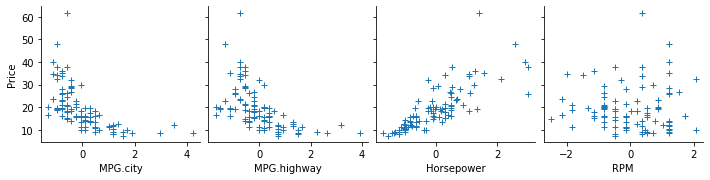

In [12]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[:4])

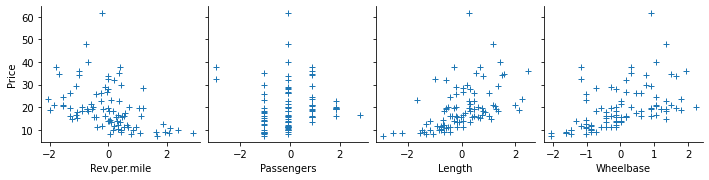

In [13]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[4:8])

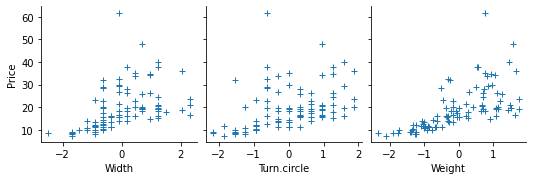

In [14]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[8:11])

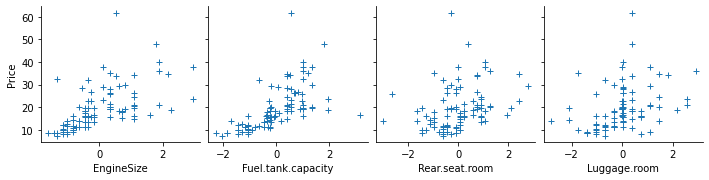

In [15]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_continuous)

##Observamos que las variables más importantes pueden ser Horsepower y weight. Segun las graficas.

#Lo converitmos en un problema binario

In [16]:
data['Price'] = 1*(data['Price']>( (data['Price'].max()- data['Price'].min())/2 ))

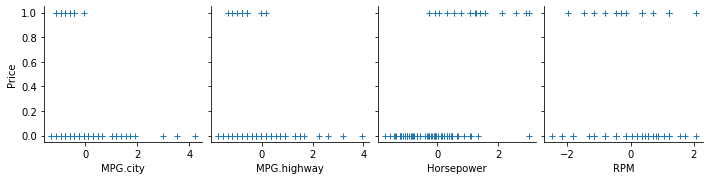

In [17]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[:4])

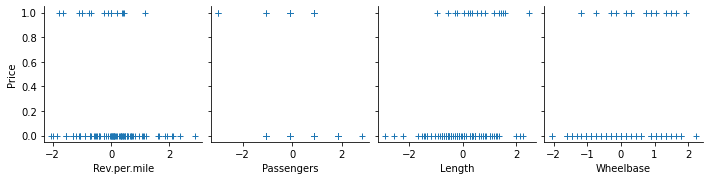

In [18]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[4:8])

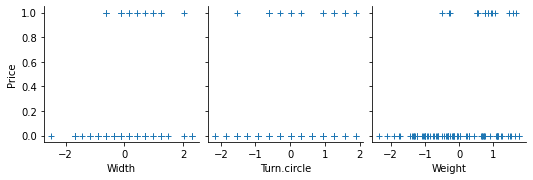

In [19]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_discreet[8:11])

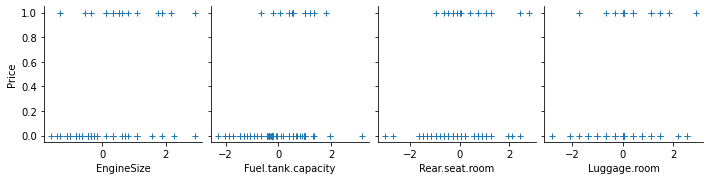

In [20]:
g = sns.pairplot(data, plot_kws=dict(marker="+", linewidth=1), y_vars='Price', x_vars=keys_continuous)

##Las dos variables más importantes para predecir el precio de un carro son:


1.   Horsepower
2.   Weight

#Se concluye a partir de las graficas

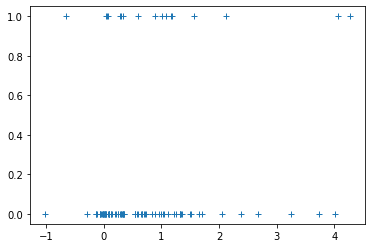

In [21]:
plt.plot(data['Horsepower'].values*data['Weight'].values, data['Price'].values,'+')

##Vemos que no el producto no muestra una clara correlacion con el precio.

#Prueba con el clasificador

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth=10)

x_train, x_test, y_train, y_test = train_test_split(data[keys_discreet + keys_continuous].values, data['Price'].values, test_size=0.2, random_state=0)

In [23]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc=sum(y_pred == y_test)/len(y_test)
np.array(keys_discreet + keys_continuous)[np.argsort(model.feature_importances_)[::-1]]

array(['Horsepower', 'Weight', 'EngineSize', 'Length', 'Width',
       'Fuel.tank.capacity', 'Wheelbase', 'MPG.highway', 'Rear.seat.room',
       'MPG.city', 'Turn.circle', 'RPM', 'Rev.per.mile', 'Luggage.room',
       'Passengers'], dtype='<U18')

#Concluimos, segun el modelo, que las variables más importantes para determinar del precio de un carro son:


1.   Horsepower
2.   Weight